In [17]:
import numpy as np
from scipy.ndimage import convolve
import matplotlib.pyplot as plt

## Parámetros globales

In [96]:
# Definimos el kernel laplaciano (máscara de difusión)
laplacian_kernel = np.array([[0.05, 0.2, 0.05],
                             [0.2, -1, 0.2],
                             [0.05, 0.2, 0.05]])

# Parámetros del sistema
DU = 0.16 # Coeficiente de difusión para U
DV = 0.08  # Coeficiente de difusión para V
F = 0.03  # Tasa de alimentación
k = 0.062  # Tasa de descomposición
dt = 0.5   # Paso de tiempo

##-------------------------------
##  F = 0.082 , k = 0.06 : Cerebro , coral 
##  F = 0.058 , k = 0.065 : rayas , gusano
##  F = 0.034 , k = 0.0618 : leopardo
##  F = 0.03  , k = 0.063 : puntos auto replicante
##  F = 0.03  , k = 0.0565 : laberintos
##  F = 0.026 , k = 0.051 : Manchas locas 
##  F = 0.014, k = 0.047 :  (reaccion de los rusos )



# Tamaño del grid
size = 1000
density = 0.001 # Densidad de las manchas iniciales
spot_size = 10 # tamaño de las manchas iniciales

# Tolerancia para la umbralización
threshold_min = 0.25
threshold_max = 0.75


## Funciones auxiliares

In [91]:
def iterate(U, V, mask, F, k, dt, threshold_min = None, threshold_max = None):
    """
    Función de iteración para el modelo de Gray-Scott.
    
    Args:
    U: Estado actual de la sustancia U.
    V: Estado actual de la sustancia V.
    mask: Máscara de difusión (kernel).
    F: Tasa de alimentación.
    k: Tasa de descomposición.
    dt: Paso de tiempo.
    
    Returns:
    U_next, V_next: Siguientes estados de U y V.
    """
    
    # Aplicamos la difusión (usando convolución con la máscara)
    delta_U = convolve(U, mask, mode='reflect')
    delta_V = convolve(V, mask, mode='reflect')
    
    # Actualizamos los valores de U y V en una sola línea de reacción
    U_next = U + (delta_U - U * V**2 + F * (1 - U)) * dt
    V_next = V + (delta_V + U * V**2 - (F + k) * V) * dt

    U_next = apply_threshold(U_next, threshold_min, threshold_max)
    V_next = apply_threshold(V_next, threshold_min, threshold_max)
    
    return U_next, V_next

def initialize_states(size, density, spot_size, threshold_min = None, threshold_max = None):
    """
    Inicializa los estados U y V con manchas aleatorias.
    
    Args:
    size: Tamaño del grid (número de celdas NxN).
    density: Densidad de manchas (probabilidad de generar una mancha en cada punto).
    spot_size: Tamaño de las manchas (radio de las perturbaciones).
    
    Returns:
    U: Estado inicial de U.
    V: Estado inicial de V.
    """
    
    # Inicializamos U y V en sus valores uniformes
    U = np.ones((size, size))
    V = np.zeros((size, size))
    
    # Iteramos sobre la malla y, para cada celda, decidimos si generamos una mancha
    for i in range(size):
        for j in range(size):
            if np.random.rand() < density:  # Decidimos si creamos una mancha
                # Generamos una perturbación alrededor del punto (i, j)
                r = spot_size // 2
                i_start = max(i - r, 0)
                i_end = min(i + r + 1, size)
                j_start = max(j - r, 0)
                j_end = min(j + r + 1, size)
                
                # Alteramos los valores de U y V dentro del área de la mancha
                U[i_start:i_end, j_start:j_end] = 0.50 + 0.1 * np.random.randn(i_end - i_start, j_end - j_start)
                V[i_start:i_end, j_start:j_end] = 0.25 + 0.05 * np.random.randn(i_end - i_start, j_end - j_start)

    U = apply_threshold(U, threshold_min, threshold_max)
    V = apply_threshold(V, threshold_min, threshold_max)
    
    return U, V
    
def apply_threshold(X, threshold_min, threshold_max):
    if threshold_min is None or threshold_max is None:
        return X
    else:
        return np.where(X < threshold_min, 0, np.where(X > threshold_max, 1, X))
    



## Visualizamos el resultado

In [ ]:
# Tolerancia para la umbralización
threshold_min = 0.1
threshold_max = 0.9

[0.26502886 0.28276339 0.28408145 ... 0.89996874 0.89998886 1.        ]
Iteración 0


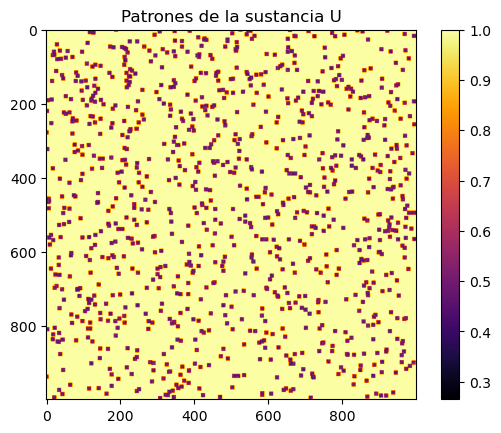

[0.02943605 0.02945531 0.0294904  ... 0.89999804 0.89999808 1.        ]
Iteración 100


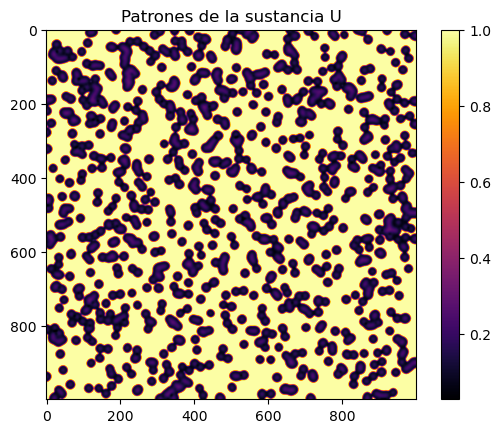

[0.05346653 0.05384237 0.05394117 ... 0.89997777 0.89998709 1.        ]
Iteración 200


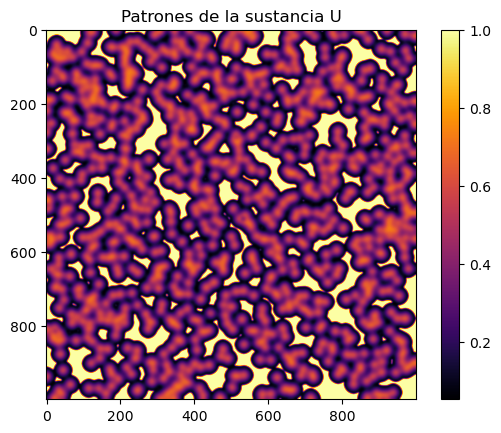

[0.05421701 0.05470942 0.05475839 ... 0.89999863 0.89999995 1.        ]
Iteración 300


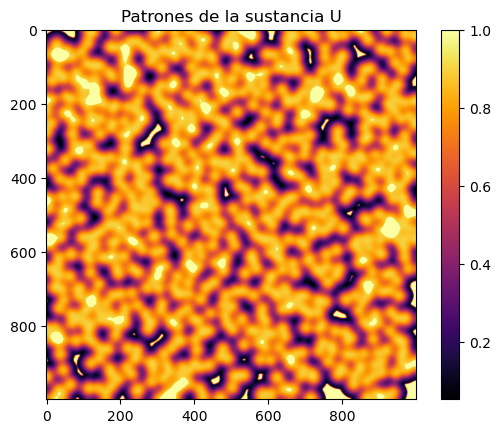

[0.06228981 0.06263492 0.06499629 ... 0.89999366 0.89999897 1.        ]
Iteración 400


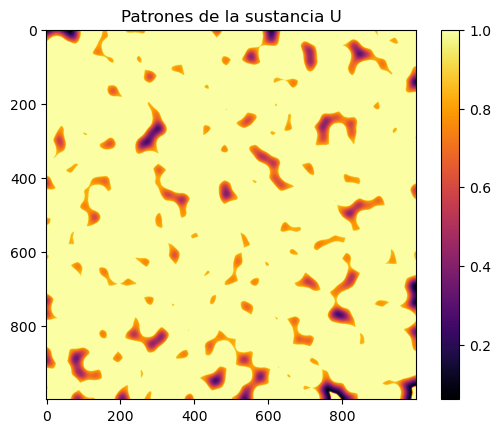

[0.07540909 0.07634281 0.07816522 ... 0.89990736 0.89998216 1.        ]
Iteración 500


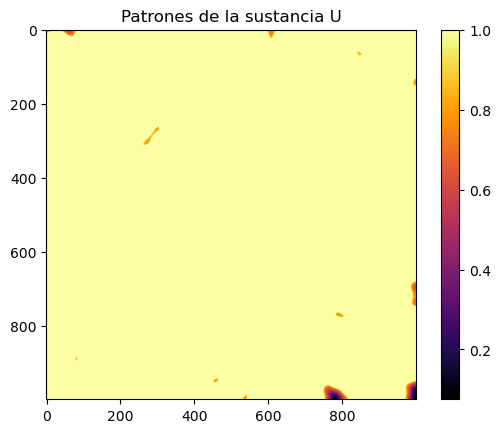

[0.62668335 0.62736188 0.62870111 0.62925304 0.62992824 0.63066606
 0.63126083 0.63320591 0.63321588 0.63436861 0.63503694 0.63574268
 0.63625618 0.63635585 0.63829054 0.63877686 0.63974146 0.6407905
 0.64197473 0.64224324 0.6426323  0.64357909 0.64379169 0.64392982
 0.64583271 0.64605939 0.64721935 0.64768331 0.64829087 0.65013986
 0.65099161 0.65124081 0.65196995 0.65197202 0.6526146  0.65388234
 0.65440083 0.65460852 0.65502367 0.65574108 0.65636132 0.65814137
 0.65831303 0.65876497 0.65923241 0.66079097 0.6610206  0.66227059
 0.66316613 0.66354124 0.66420604 0.6643059  0.6648293  0.6652079
 0.66605871 0.66639922 0.66755361 0.66786078 0.66788466 0.66791767
 0.66958004 0.67018703 0.67062343 0.67177366 0.67189552 0.67221253
 0.67297618 0.6738966  0.67487879 0.6757935  0.67615699 0.67618112
 0.67649332 0.67724697 0.67807016 0.67816901 0.67845375 0.67846836
 0.67878135 0.67906851 0.67911594 0.67955253 0.67965173 0.67990324
 0.68002984 0.68025219 0.68042179 0.68071641 0.6809021  0.681677

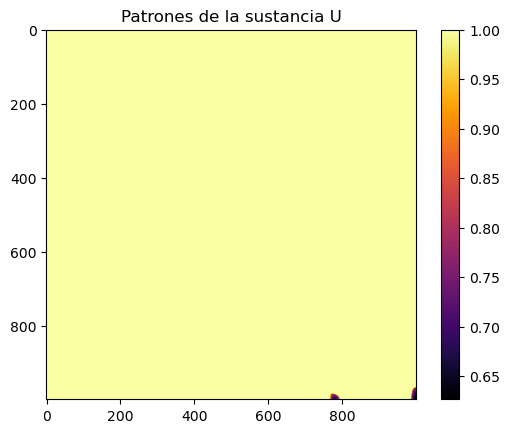

[1.]
Iteración 700


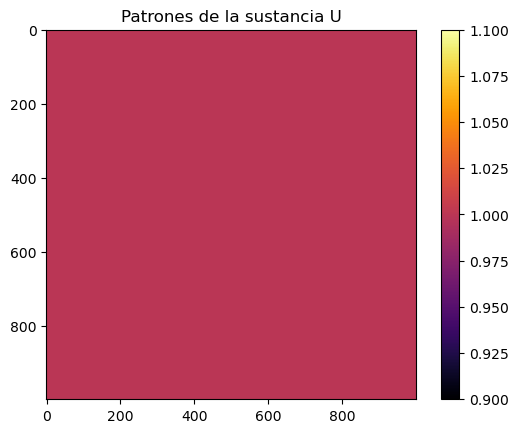

[1.]
Iteración 800


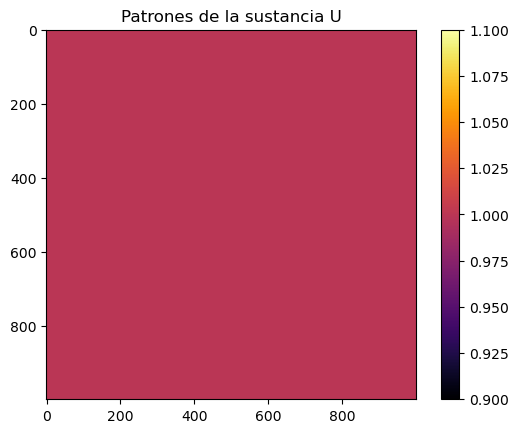

[1.]
Iteración 900


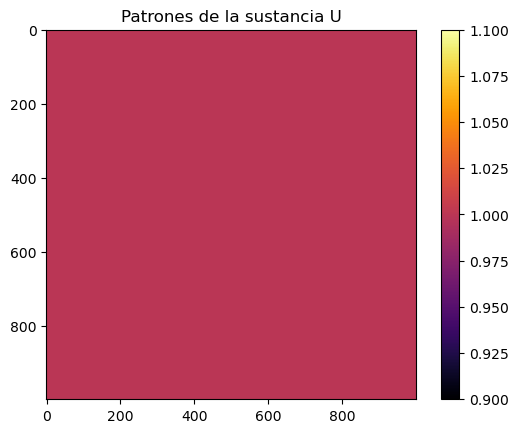

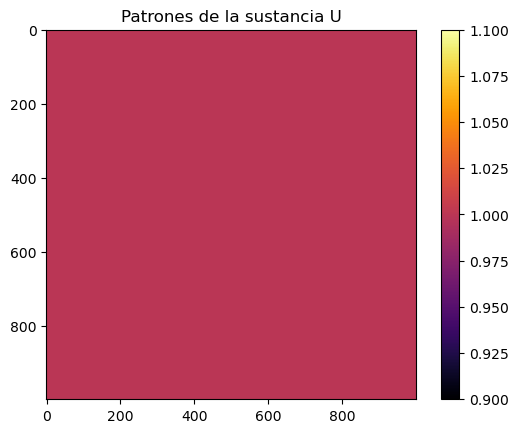

In [104]:
# Creamos una perturbación inicial
U, V = initialize_states(size, density, spot_size, threshold_min = threshold_min, threshold_max = threshold_max)

# Simulamos varios pasos
for i in range(1000):
    U, V = iterate(U, V, laplacian_kernel, F, k, dt, threshold_min = threshold_min, threshold_max = threshold_max)

    if i % 100 == 0:
        print(np.unique(U))
        print(f"Iteración {i}")
        plt.imshow(U, cmap='inferno')
        plt.colorbar()
        plt.title("Patrones de la sustancia U")
        plt.show()

plt.imshow(U, cmap='inferno')
plt.colorbar()
plt.title("Patrones de la sustancia U")
plt.show()
